### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company has collected a data set from the sale of houses in Australia.
 
The company is looking at prospective properties to buy to enter the market. They want to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
 - Which variables are significant in predicting the price of a house
 - How well those variables describe the price of a house.
 
Business Goal :
 
This model will then be used by the management to understand how exactly the prices vary with the variables. 
Finding and accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# impoting important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from math import sqrt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Reading the data and understanding the Data

In [2]:
# Reading the data
house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# converting the data type for catagorical columns which are wrongly classified
column = ["YrSold","MSSubClass","MoSold","OverallQual","OverallCond"]
for col in column:
    house_df[col]= house_df[col].astype('object')

In [6]:
# Checking the missing data
round((house_df.isnull().sum()/len(house_df)*100),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

### Missing value treatment and Data exploration

In [7]:
# As NA is used to represent none values creating replacing NA with  a different catagory
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna("NoFire")
house_df['Fence'] = house_df['Fence'].fillna("NoFence")
# Dropping the column ID as this is the ID for the property and can not be used for model building
house_df = house_df.drop("Id", axis =1)
# Dropping the columns were the % of NA values are more than 90%
house_df = house_df.drop(["Alley","PoolQC","Fence","MiscFeature"], axis =1)

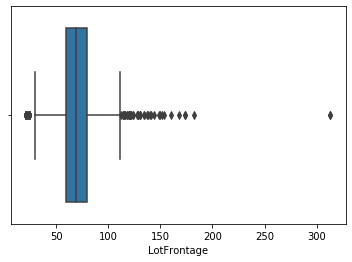

In [8]:
sns.boxplot(house_df["LotFrontage"])
house_df ["LotFrontage"]=house_df["LotFrontage"].fillna(house_df["LotFrontage"].median())

In [9]:
# Imputing the missing values for garage built with Yearbuilt
house_df["GarageYrBlt"]  = house_df["GarageYrBlt"].fillna(house_df["YearBuilt"])

In [10]:
# Imputing wrongly labeled values as missing values NA means not available
for items in ['GarageQual','GarageFinish','GarageType','GarageCond']:
    house_df[items] = house_df[items].fillna("Nogarage")

for items in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
    house_df[items] = house_df[items].fillna("NoBsmt")

In [11]:
# Drop the data containing null values.
house_df = house_df.dropna(axis =0)

In [12]:
house_df.shape

(1451, 76)

In [13]:
house_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1976.350793,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999
std,22.044429,9992.987081,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,26.301494,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273
min,21.000000,1300.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7537.500000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,69.000000,9477.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,79.000000,11600.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [14]:
# adding new features as age of the building 
house_df['Age_building'] = house_df['YearBuilt'].max() - house_df['YearBuilt']
house_df['Age_Remodel'] = house_df['YearRemodAdd'].max() - house_df['YearRemodAdd']
house_df['Age_Garage'] = house_df['GarageYrBlt'].max() - house_df['GarageYrBlt']
house_df = house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis =1)
house_df['TotalArea'] = house_df['1stFlrSF']+house_df['2ndFlrSF']+house_df['TotalBsmtSF']
house_df['TotalBath'] = house_df['BsmtFullBath']+0.5*house_df['BsmtHalfBath']+house_df['FullBath']+0.5*house_df['HalfBath']


In [15]:
# Finding the catagorical and numeric columns based on datatype
def set_columns(house_df):
    columns  = list(house_df.columns)
    num_col = [col for col in columns if house_df[col].dtype!='object']
    cat_col  = [col for col in columns if house_df[col].dtype=='object']
    return(num_col,cat_col)
num_col,cat_col = set_columns(house_df)
print(num_col)
print(cat_col)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age_building', 'Age_Remodel', 'Age_Garage', 'TotalArea', 'TotalBath']
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',

In [16]:
house_df[num_col].quantile([0.05,0.25,0.75,0.9,0.95])    

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_building,Age_Remodel,Age_Garage,TotalArea,TotalBath
0.05,36.0,3273.0,0.0,0.0,0.0,0.0,520.0,672.5,0.0,0.0,848.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88000.0,3.0,3.0,3.0,1535.5,1.0
0.25,60.0,7537.5,0.0,0.0,0.0,222.0,795.0,882.0,0.0,0.0,1128.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,327.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129900.0,10.0,6.0,9.0,2008.0,2.0
0.75,79.0,11600.0,166.0,707.0,0.0,808.0,1297.5,1391.0,728.0,0.0,1776.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,214000.0,56.0,44.0,51.0,3003.5,2.5
0.90,92.0,14375.0,335.0,1064.0,119.0,1232.0,1602.0,1680.0,954.0,0.0,2158.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,757.0,262.0,130.0,112.0,0.0,0.0,0.0,0.0,278000.0,86.0,60.0,71.0,3542.0,3.5
0.95,104.0,17308.5,456.0,1272.0,398.0,1468.0,1749.0,1827.0,1141.5,0.0,2464.0,1.0,1.0,2.0,1.0,4.0,1.0,10.0,2.0,3.0,849.0,335.0,173.0,180.0,0.0,160.0,0.0,0.0,325812.0,94.0,60.0,86.0,3960.0,3.5


In [17]:
# dropping columns which has >90 % of data with sme value
house_df.drop(["LowQualFinSF","BsmtHalfBath","KitchenAbvGr","3SsnPorch","ScreenPorch","PoolArea","MiscVal"],axis =1, 
              inplace =True)
num_col,cat_col = set_columns(house_df)


### Outlier Treatment for Numeric columns 

In [18]:
for item in num_col:
    Q1 = house_df[item].quantile(0.05)
    Q3 = house_df[item].quantile(0.95)
    IQR = Q3-Q1
    house_df = house_df[(house_df[item]>(Q1-1.5*IQR)) & (house_df[item]<(Q3+1.5*IQR))]

In [19]:
house_df.shape

(1415, 71)

### EDA : Understanding the Target Variable

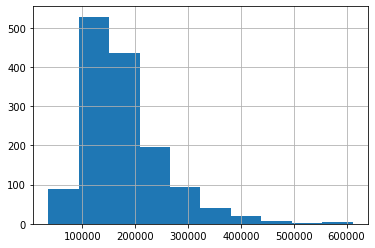

In [20]:
house_df["SalePrice"].hist()

In [21]:
SalePrice = pd.DataFrame()
SalePrice["SalePrice"] = house_df["SalePrice"]
house_df["LogPrice"] = np.log1p(house_df["SalePrice"])

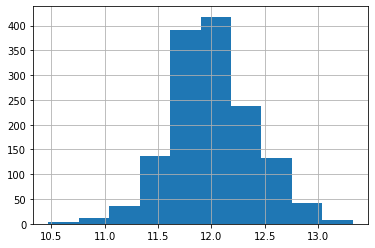

In [22]:
house_df["LogPrice"].hist()

In [23]:
house_df = house_df.drop("SalePrice", axis =1)
num_col,cat_col = set_columns(house_df)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,Age_building,Age_Remodel,Age_Garage,TotalArea,TotalBath,LogPrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,NoFire,Attchd,RFn,2,548,TA,TA,Y,0,61,0,2,2008,WD,Normal,7,7,7.0,2566,3.5,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,5,2007,WD,Normal,34,34,34.0,2524,2.5,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,9,2008,WD,Normal,9,8,9.0,2706,3.5,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,2,2006,WD,Abnorml,95,40,12.0,2473,2.0,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,12,2008,WD,Normal,10,10,10.0,3343,3.5,12.429220


### EDA : Independent variables with numeric variables 

In [24]:
def num_plot(item):
    plt.figure(figsize = (10,4))
    plt.subplot(1,3,1)
    plt.boxplot(house_df[item])
    plt.title(item)
    plt.subplot(1,3,2)
    plt.hist(house_df[item])
    plt.title(item)
    plt.subplot(1,3,3)
    plt.scatter(x=item, y = 'LogPrice', data = house_df)
    plt.tight_layout()    

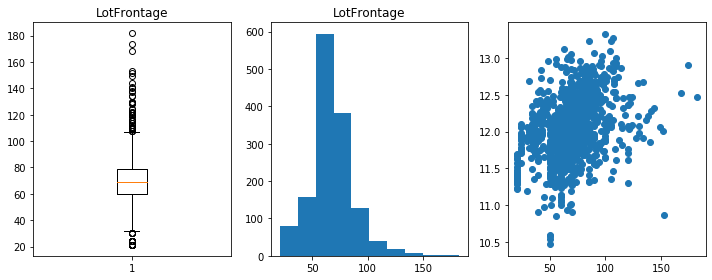

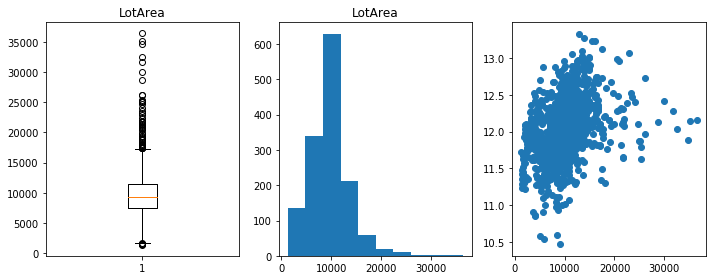

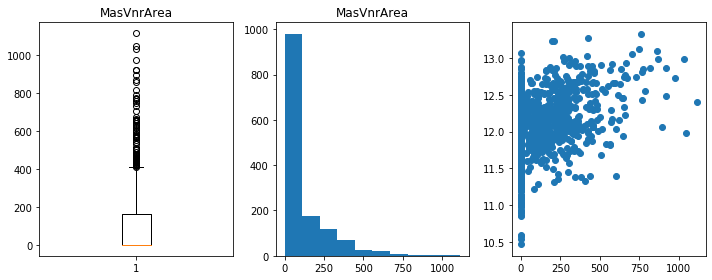

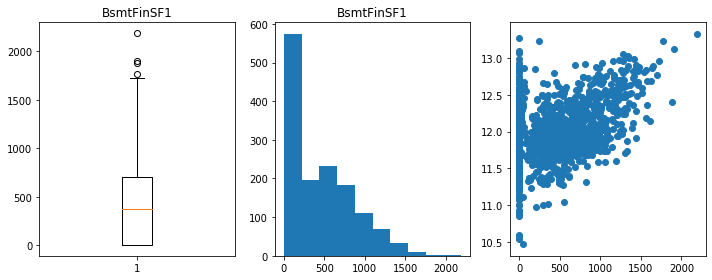

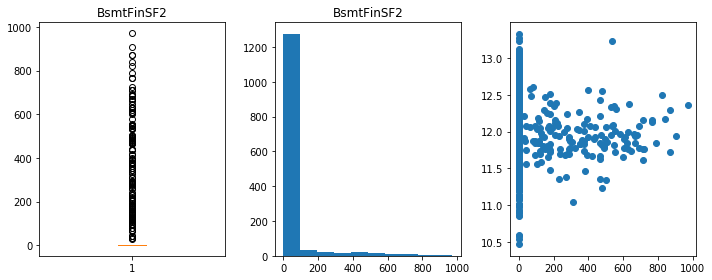

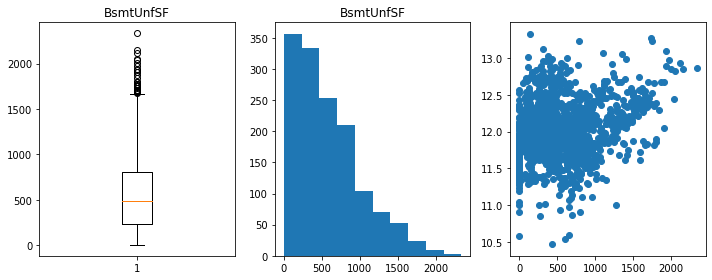

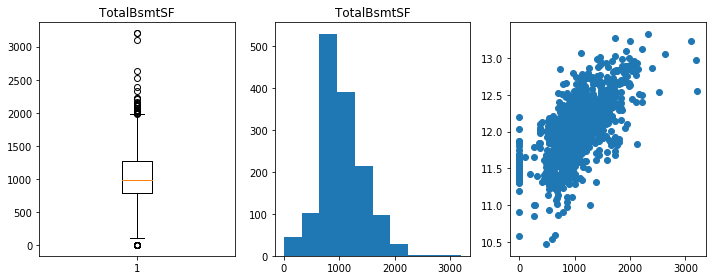

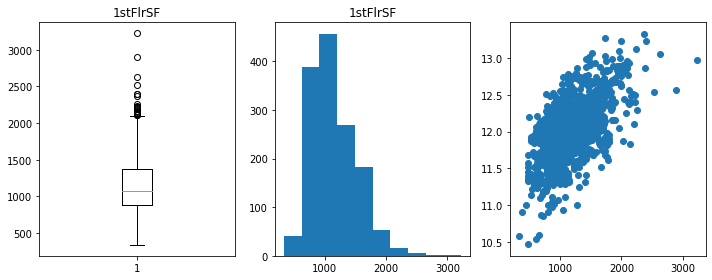

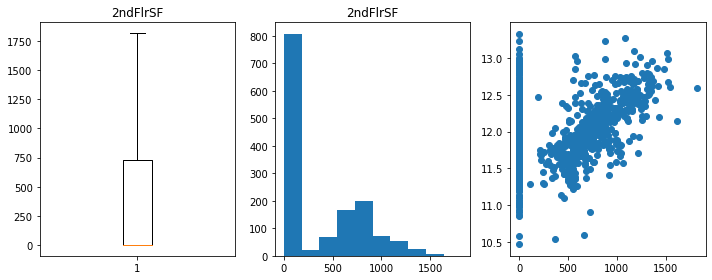

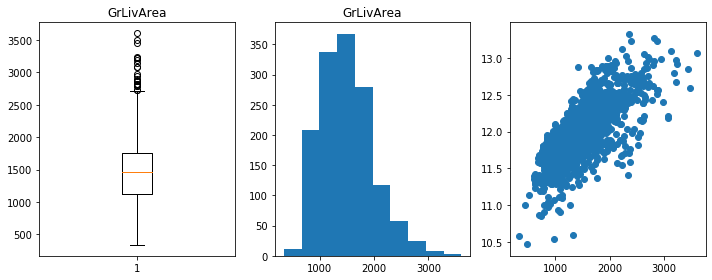

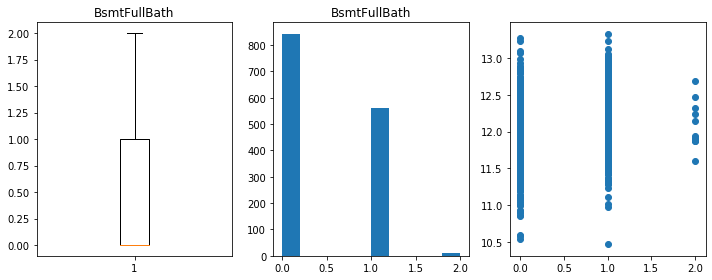

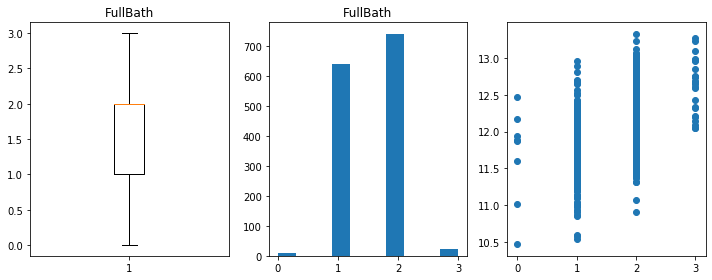

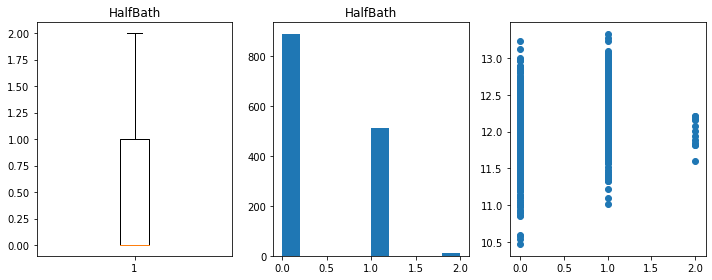

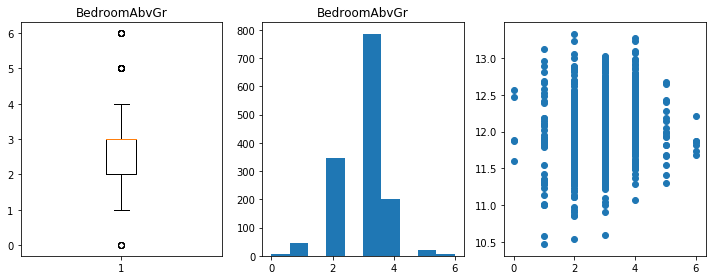

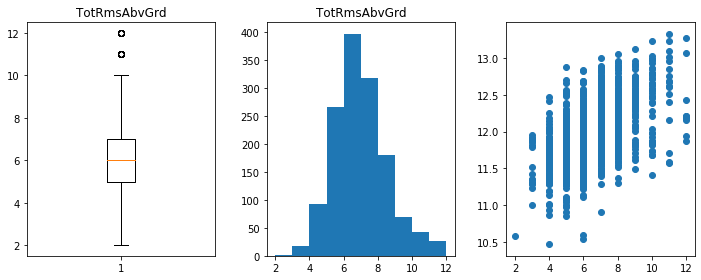

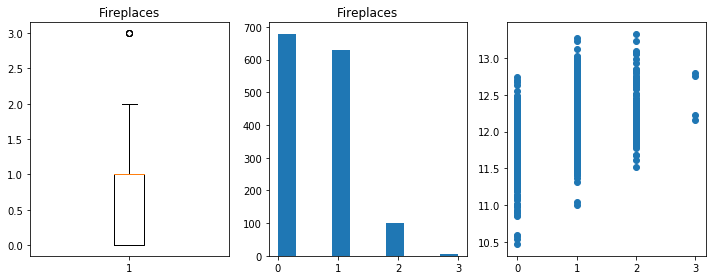

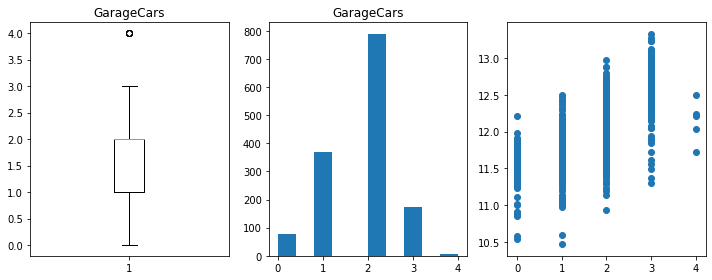

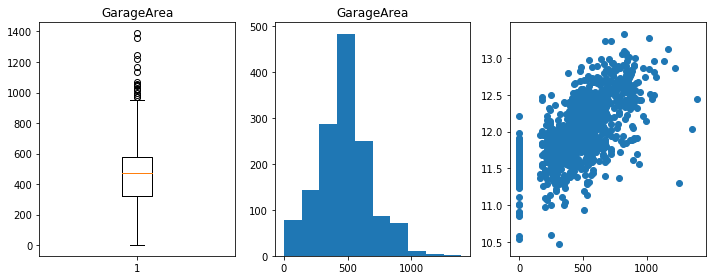

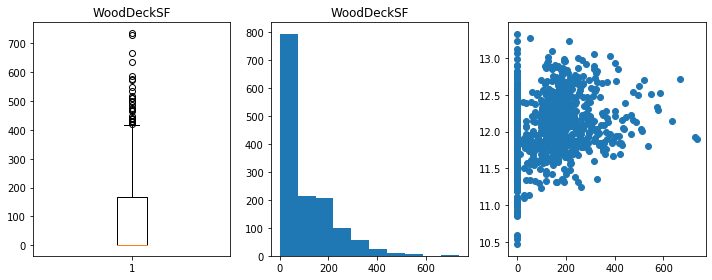

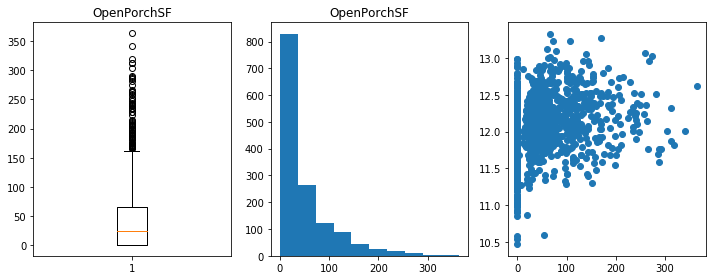

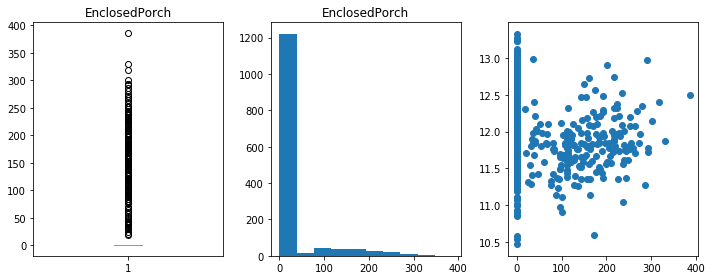

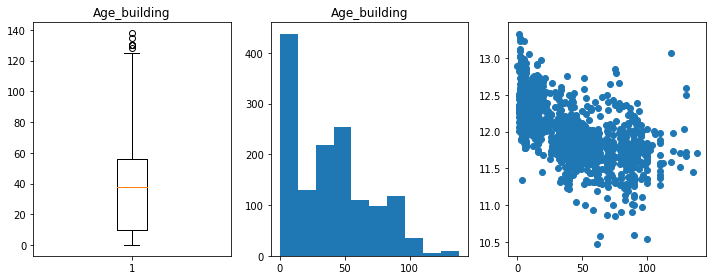

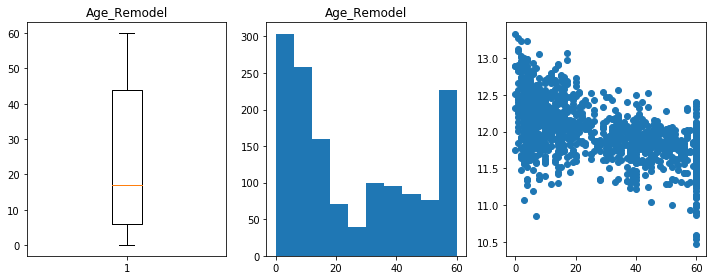

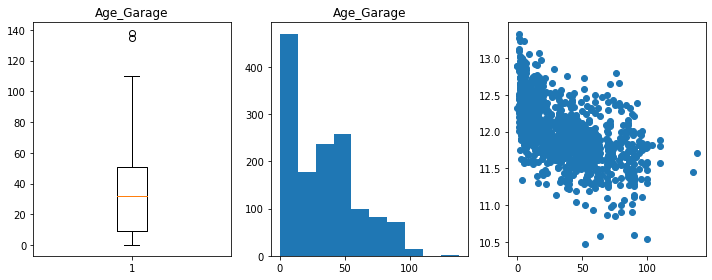

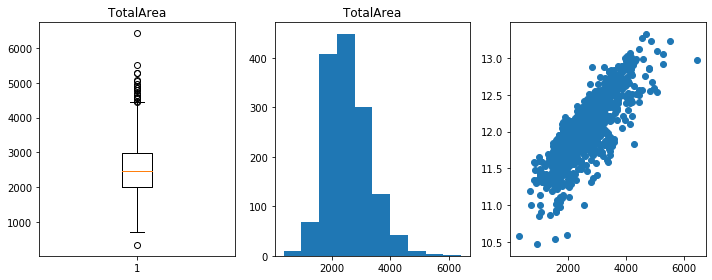

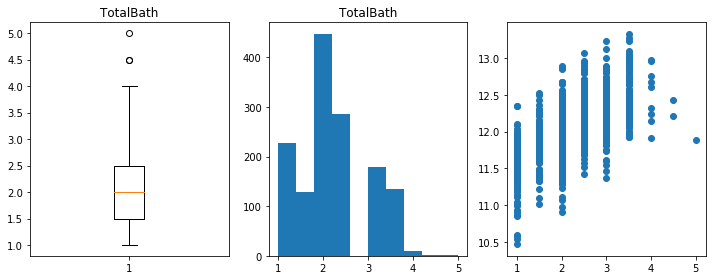

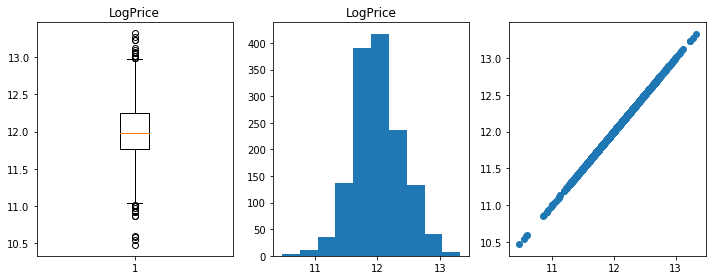

In [25]:
for items in num_col:
    num_plot(items)

#### Inferences:
 - The price of the house increases with increase in bathroom.No of data with bathroom>4 are very less for drawing any inference.
 - The Price of the House increses with increase in Total Area,Garage Area, Total no of Bedrooms etc.

In [26]:
house_df.shape


(1415, 71)

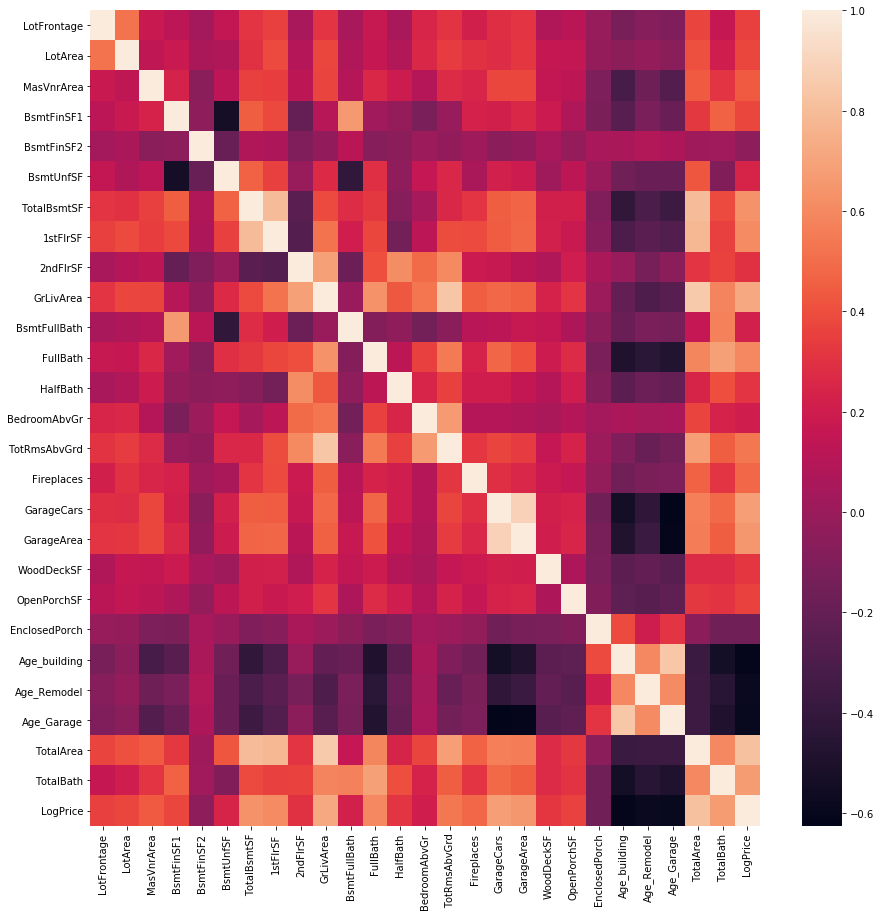

In [27]:
plt.figure(figsize = (15,15))
sns.heatmap(house_df[num_col].corr())

#### Inferences:

    - Age of Building, Age of Garage and Age of remodeling have very high positive correlationship.
     - Sele Price has negetive correlation with Age of the building (The older Buildings have lesser sale price compare to new buildings)
     The no of bat rooms and Garage are also have negetive corelation with Age of the building.

### EDA: Independent variable with catagorical values 

In [28]:
def cat_visual(item):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.title(item)
    sns.boxplot(x = item, y ="LogPrice", data = house_df)
    plt.xticks(rotation =45)
    data = pd.DataFrame(round(house_df[item].value_counts()/len(house_df[item])*100,2)).reset_index()
    data.columns = ["Cat","Perc"]
    plt.subplot(1,2,2)
    plt.title(item)
    plt.xticks(rotation =45)
    sns.barplot(x="Cat", y ="Perc",data = data)
    plt.tight_layout()

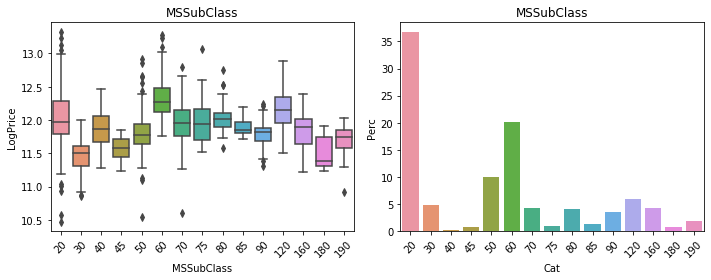

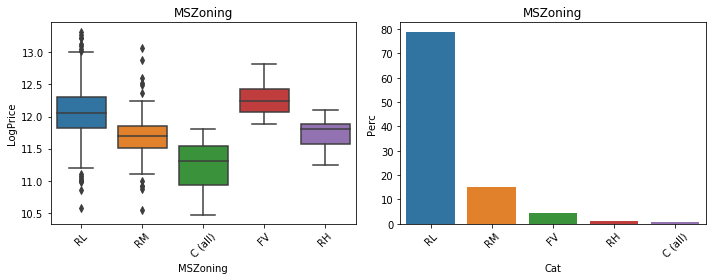

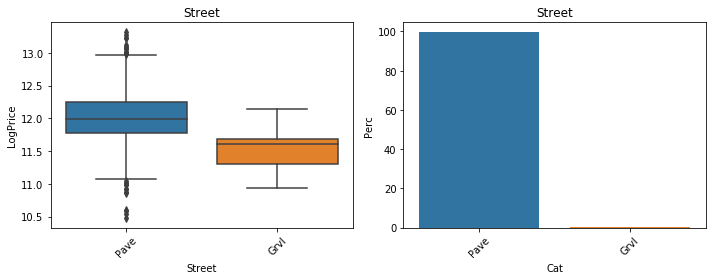

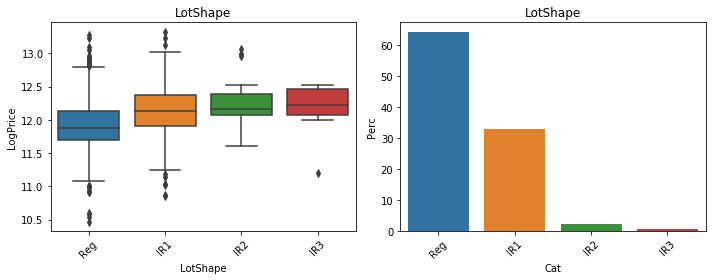

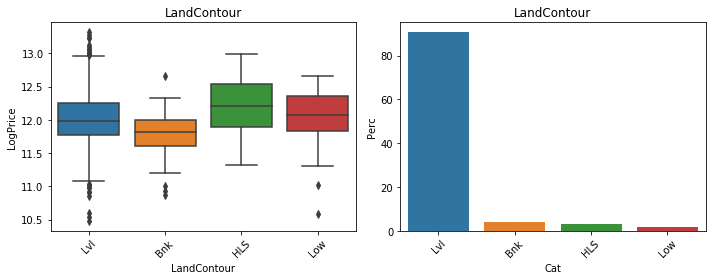

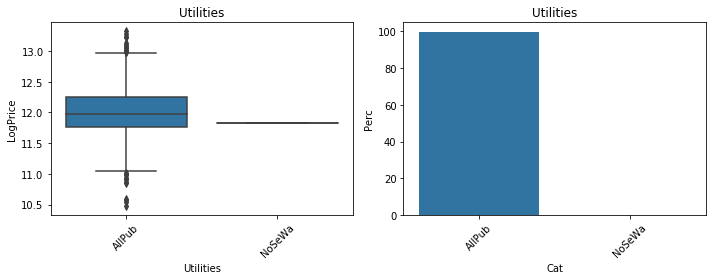

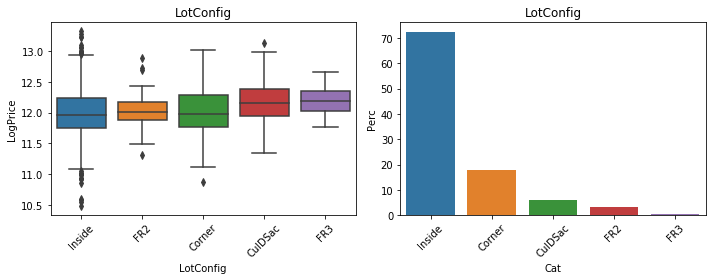

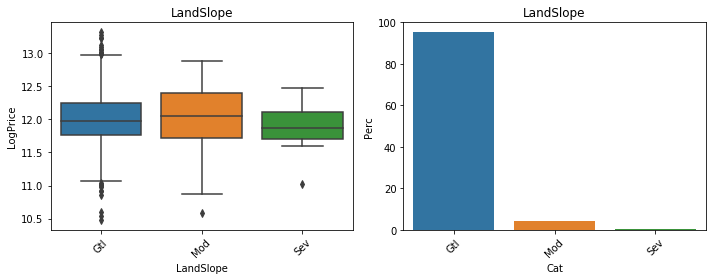

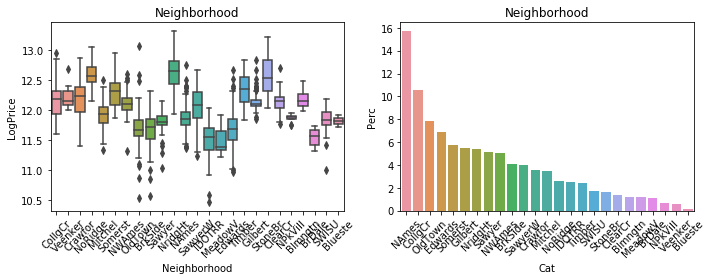

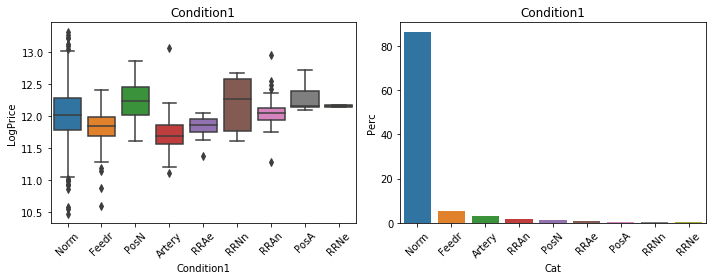

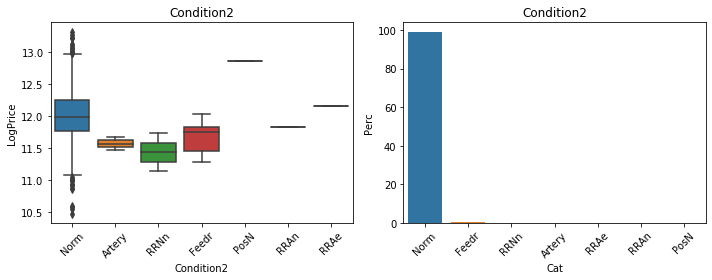

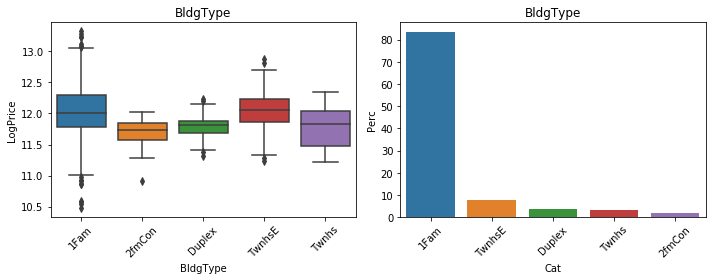

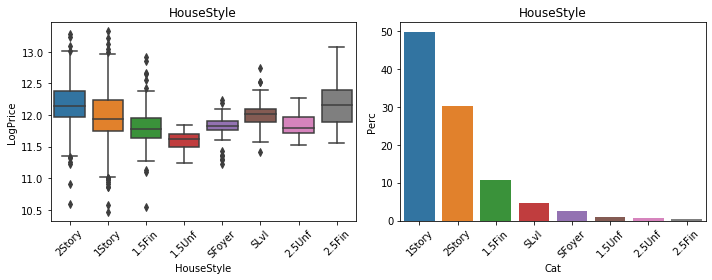

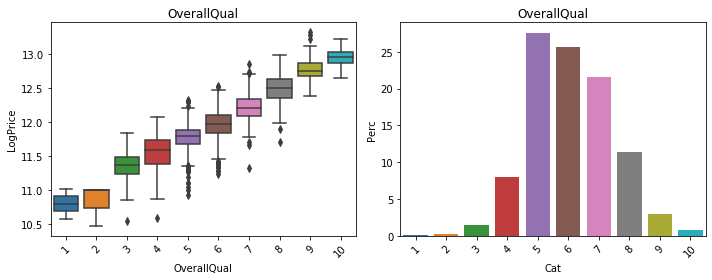

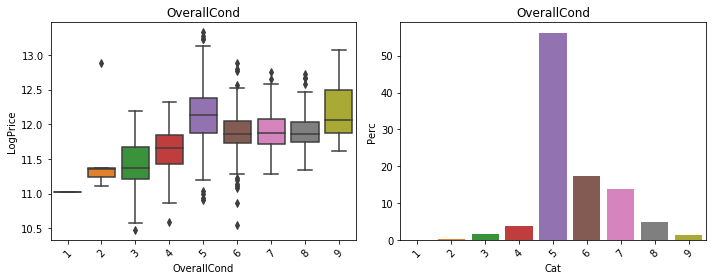

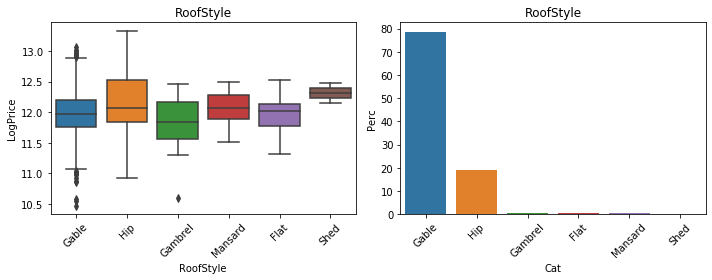

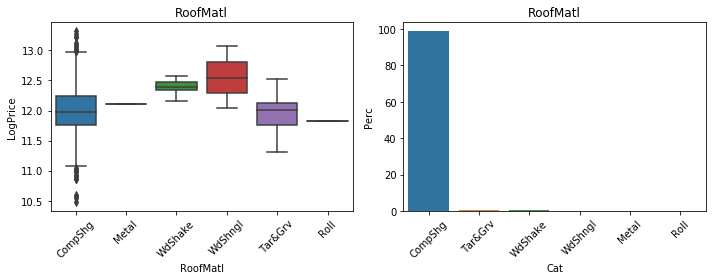

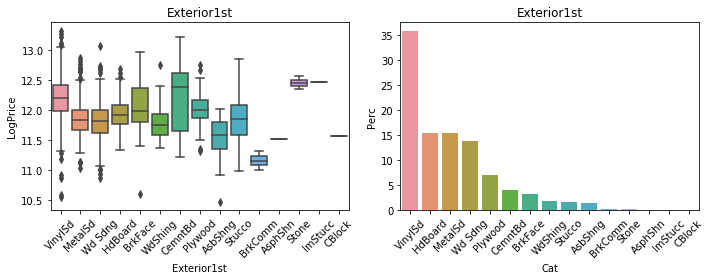

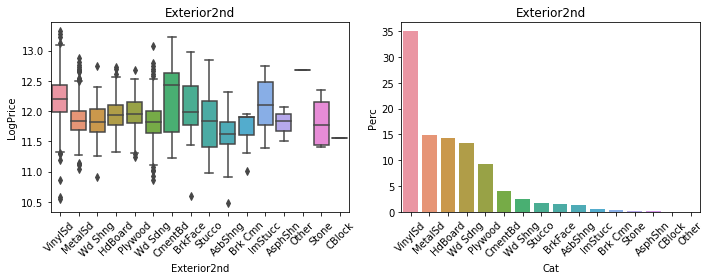

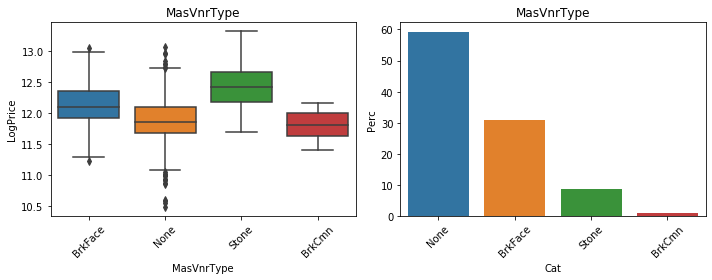

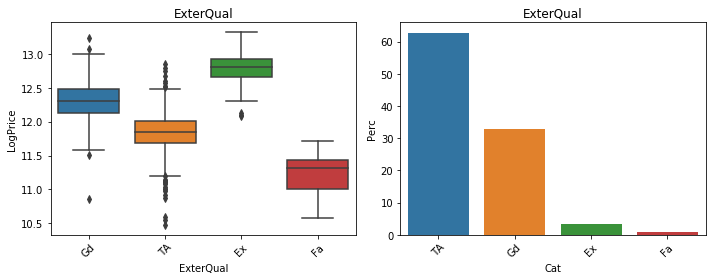

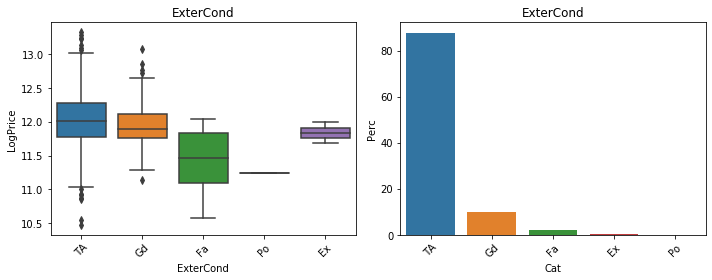

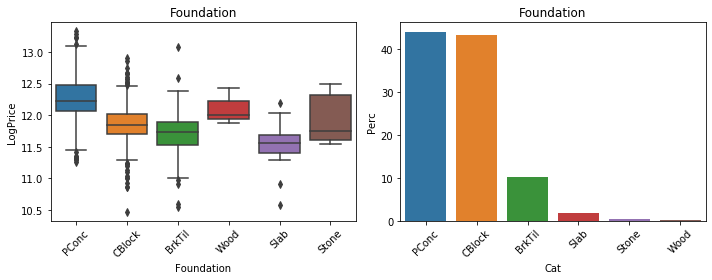

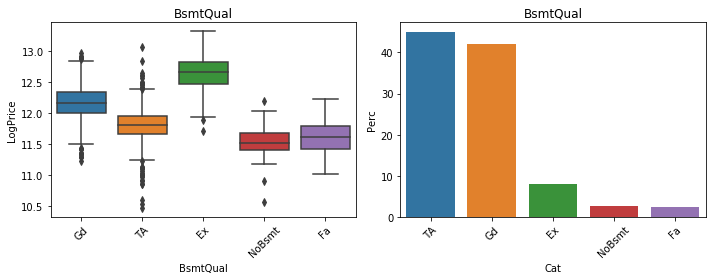

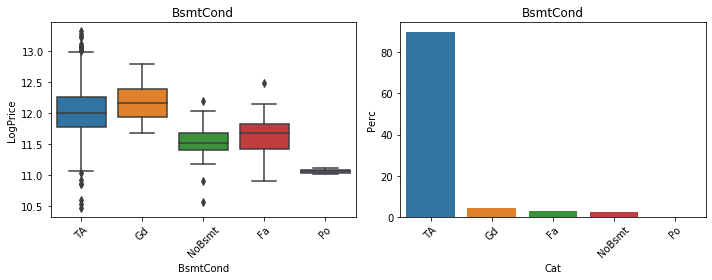

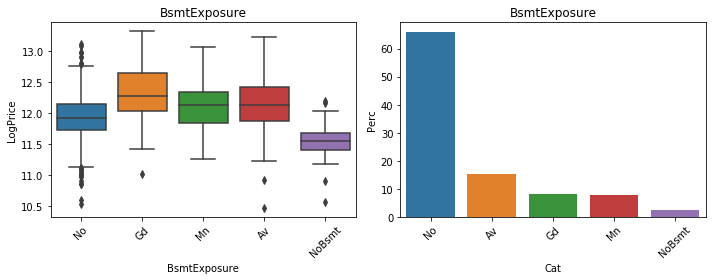

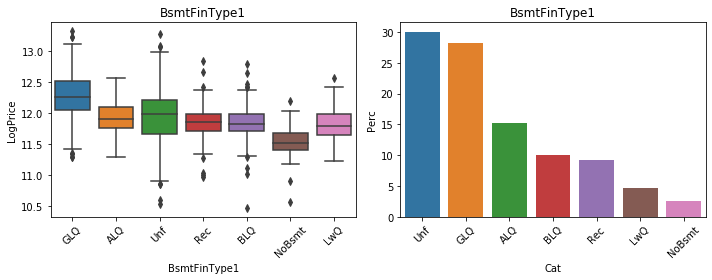

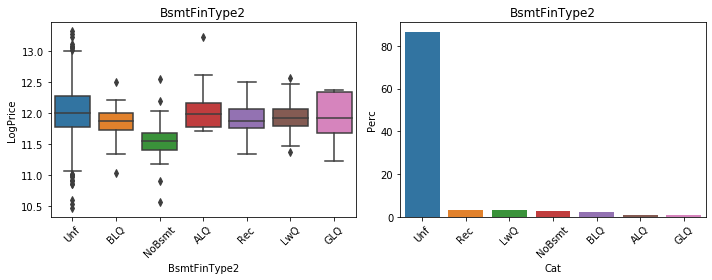

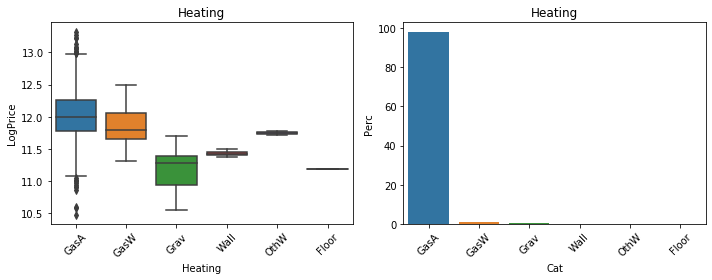

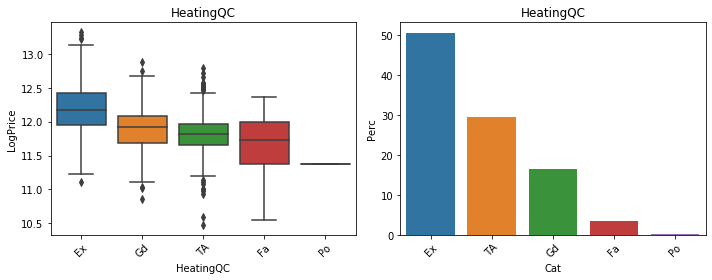

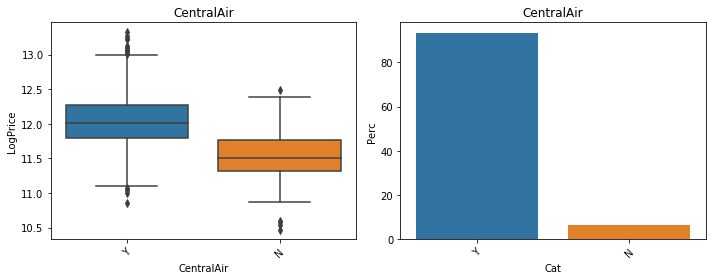

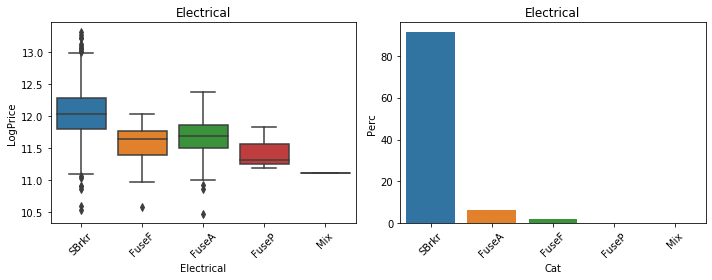

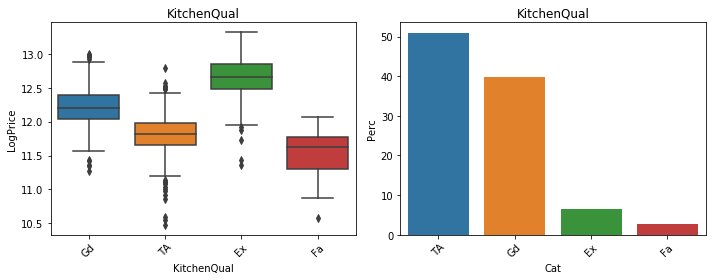

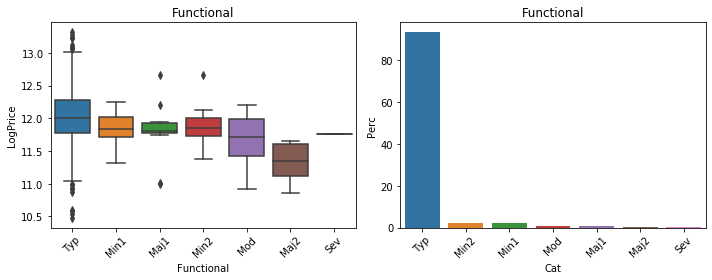

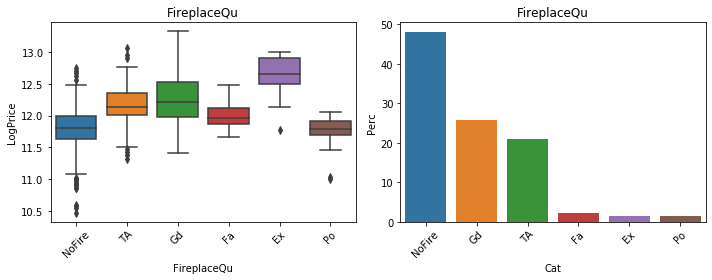

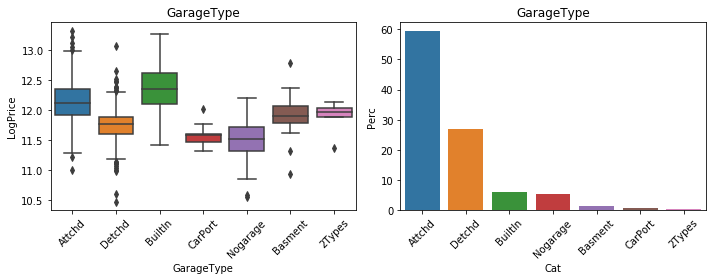

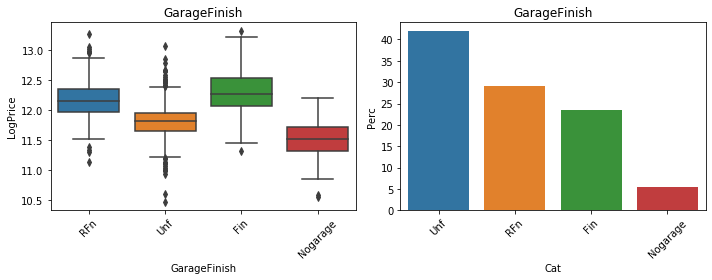

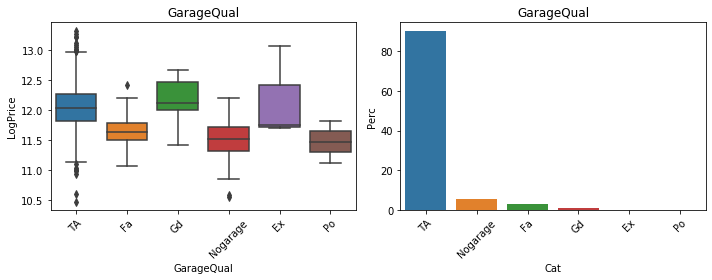

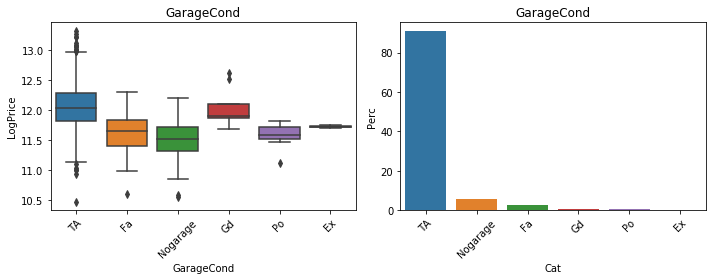

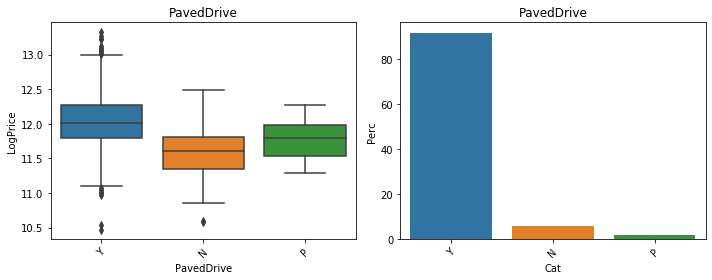

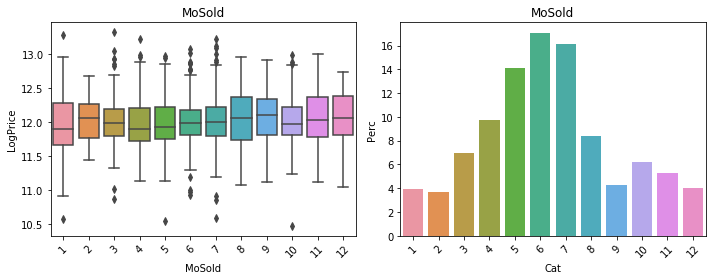

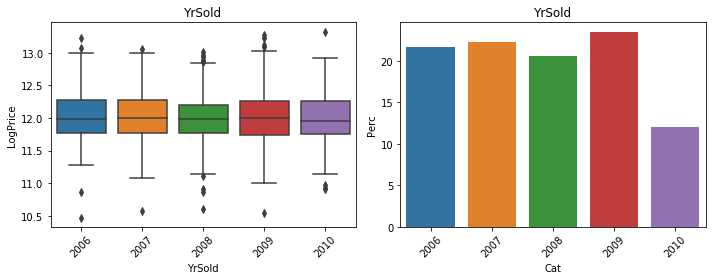

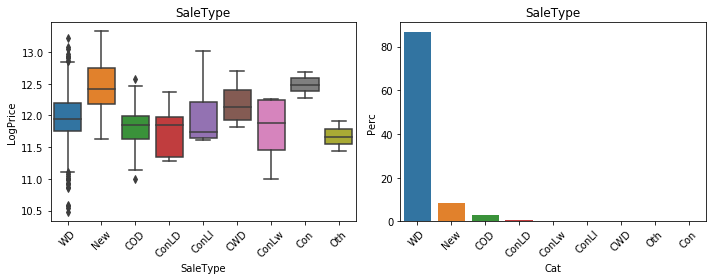

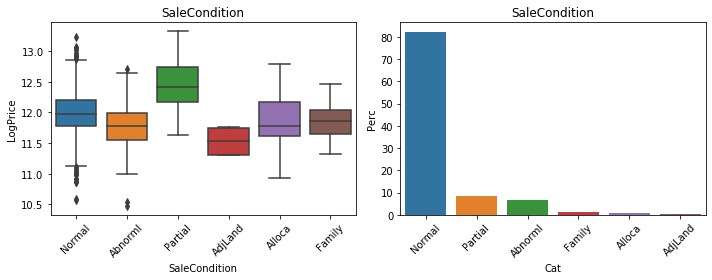

In [29]:
# Visualization for catagorical columns
for items in cat_col:
    cat_visual(items)

#### Inferences: 

 - The distibution of Sale Price seems to be similar for Year sold.
  - Sales price increased based on the OverallQuality of the building rating.
  - The Sale price of the building with central airconditioning is highr than those without it.
  - The sales price is significantly higher for the buildings with Excellent Exterior condition
 

In [30]:
# removing column yr sold as theere is no significnt chsnge in price
house_df=house_df.drop('YrSold',axis =1)

In [31]:
# converting the the data which has very high inequality
house_df=house_df.drop(['Utilities','Street', 'Condition2', 'RoofMatl','GarageCond','GarageQual','Functional',
                        'Heating','BsmtFinType2','LandSlope','LandContour'],axis =1)
num_col,cat_col = set_columns(house_df)

In [32]:
#Converting the values to new values
house_df['Condition1'] = house_df['Condition1'].replace(['RRAe', 'RRNe', 'RRNn','PosA'], 'Other_cond')
house_df['RoofStyle'] = house_df['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'], 'Other_roof')
house_df['Exterior1st'] = house_df['Exterior1st'].replace(['CBlock','AsphShn','ImStucc','BrkComm','Stone','Stucco','AsbShng',
                                                           'WdShing'], 'Other_ext')
house_df['Exterior2nd'] = house_df['Exterior2nd'].replace(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','ImStucc',
                                                           'Plywood','PreCast','Stone','Stucco','WdShing'],'Other')
house_df['SaleType'] = house_df['SaleType'].replace(['CWD','VWD','Con','ConLw','ConLI','ConLD'], 'Oth')
house_df['SaleCondition'] = house_df['SaleCondition'].replace(['AdjLand','Alloca','Family'], 'Other_cond')
house_df['GarageType'] = house_df['GarageType'].replace(['2Types','Basment','CarPort','NA'], 'Other_type')
house_df['HouseStyle'] = house_df['HouseStyle'].replace(['1.5Unf','2.5Unf','2.5Fin'], 'Other')
house_df['LotShape'] = house_df['LotShape'].replace(['IR2','IR3'], 'IR2_3')
house_df['MSZoning'] = house_df['MSZoning'].replace(['C (all)','RH'], 'Other')
house_df['Electrical'] = house_df['Electrical'].replace(['FuseF','FuseF','Mix'], 'Other')
house_df['OverallCond'] =house_df['OverallCond'].replace ({'1':'<4','2':'<4','3':'<4','4':'4-5','5':'4:5','6':'6-8',
                                                          '7':'6-8','8':'6-8'})
house_df['OverallQual'] =house_df['OverallQual'].replace ({'1':'<=3','2':'<=3','3':'<=3'})

In [33]:
# get dummy variables for catagorical values
cat = house_df[cat_col]
cat = pd.get_dummies(cat,drop_first = True)
cat.head()

,OverallQual,OverallCond,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR2_3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other_cond,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other_roof,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other_ext,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseP,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFire,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Nogarage,GarageType_Other_type,GarageFinish_Nogarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Other_cond,SaleCondition_Partial
0,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,7,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1

In [34]:
# Finding the numerical columns for Scaling the data
house_price = house_df.drop(cat_col, axis =1)
X_scale_list =list(house_price.columns)
X_scale_list.remove('LogPrice')


In [35]:
# Creating the final dataframe which contains both numeric and dummy columns for catagorical variables
house_price = pd.concat([house_price,cat],axis=1)
house_price.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Age_building,Age_Remodel,Age_Garage,TotalArea,TotalBath,LogPrice,OverallQual,OverallCond,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR2_3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other_cond,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other_roof,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other_ext,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseP,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFire,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Nogarage,GarageType_Other_type,GarageFinish_Nogarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Other_cond,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,0,7,7,7.0,2566,3.5,12.247699,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,0,34,34,34.0,2524,2.5,12.109016,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,0,9,8,9.0,2706,3.5,12.317171,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,

### Model Building 

In [36]:

# split into train and test
df_train, df_test = train_test_split(house_price,train_size=0.7,test_size = 0.3, random_state=100)

In [37]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
# Instantiate scaler object
scalerX = StandardScaler()
scalery = StandardScaler()
X_train = df_train.drop("LogPrice",axis =1)
y_train  = df_train[["LogPrice"]]
# Fit and transform on the train set
X_train[X_scale_list] = scalerX.fit_transform(X_train[X_scale_list])
y_train["LogPrice"] = scalery.fit_transform(y_train)

## Ridge Regression

In [38]:
# list of alphas to tune
params = {'alpha': [0.1, 1,2,3,4,5,6,10,50,100 ]}

ridge = Ridge()
# cross validation
model_cv_r= GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',cv = 5, 
                        return_train_score=True,verbose = 1)            
model_cv_r .fit(X_train, y_train) 
# summarize the results of the grid search
cv_results_r = pd.DataFrame(model_cv_r.cv_results_)

print(model_cv_r.best_score_)
print(model_cv_r.best_estimator_.alpha)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.20137602081590328
10


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.6s finished


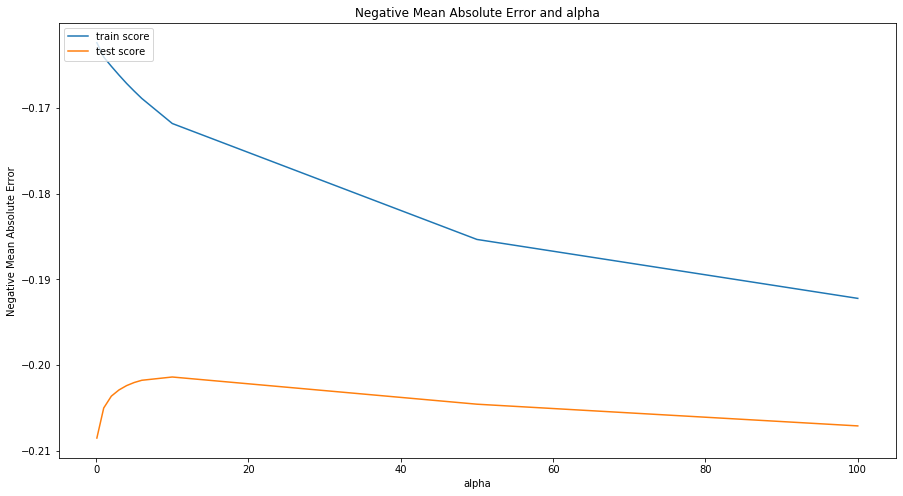

In [39]:
# plotting mean test and train scoes with alpha 
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(15,8))
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [40]:
model_r = Ridge(alpha=10)
model_r.fit(X_train, y_train)
print(model_r.coef_)

[[ 2.01839550e-02  5.23950375e-02  9.96978823e-03  6.66000839e-02
   3.12062880e-03  2.98317877e-03  7.21518928e-02  3.91655837e-02
   6.15652713e-02  1.46981748e-01  1.25744765e-04  7.55067558e-03
   2.83100940e-02  1.05204973e-02  1.32693280e-02  3.61286512e-02
   4.99593397e-02  3.57223868e-02  1.59555023e-02  1.90795709e-02
   1.16910849e-02 -1.38240573e-01 -4.52483159e-02 -6.77235853e-03
   9.38916614e-02  4.72166655e-02  1.47370190e-01  1.23465458e-01
  -1.12999502e-01 -2.48843851e-02 -2.25040033e-03  1.96387912e-02
   1.32162772e-02  1.19633153e-01 -3.91907643e-03 -8.84803897e-03
   7.74139224e-03 -3.48272882e-02  1.46516093e-02 -1.29777739e-01
   2.24058609e-02 -3.51324162e-02 -1.08823797e-01  1.11583262e-02
  -9.09126574e-02  3.83927381e-02 -4.01096636e-03  5.34358270e-02
  -6.76398468e-02 -4.06210638e-02 -3.73181887e-02  1.76418130e-02
  -6.46289933e-02  6.39578539e-02 -5.09115393e-02 -4.24167297e-02
   2.19693935e-01 -5.64389101e-02 -3.66505618e-02 -9.88840916e-02
  -1.06109

### Model Parameters 

In [41]:
modelr = pd.DataFrame()

modelr["paramters"] = list(X_train.columns)
modelr["coefficient"] = model_r.coef_[0]
modelr = modelr.sort_values(by ="coefficient", ascending =False).reset_index()
modelr.head(10)

,index,paramters,coefficient
0,56,Neighborhood_Crawfor,0.219694
1,72,Neighborhood_StoneBr,0.193186
2,177,SaleCondition_Normal,0.152877
3,26,OverallQual,0.147370
4,9,GrLivArea,0.146982
5,174,SaleType_New,0.137415
6,27,OverallCond,0.123465
7,116,Foundation_PConc,0.121613
8,33,MSSubClass_70,0.119633
9,142,CentralAir_Y,0.105937


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

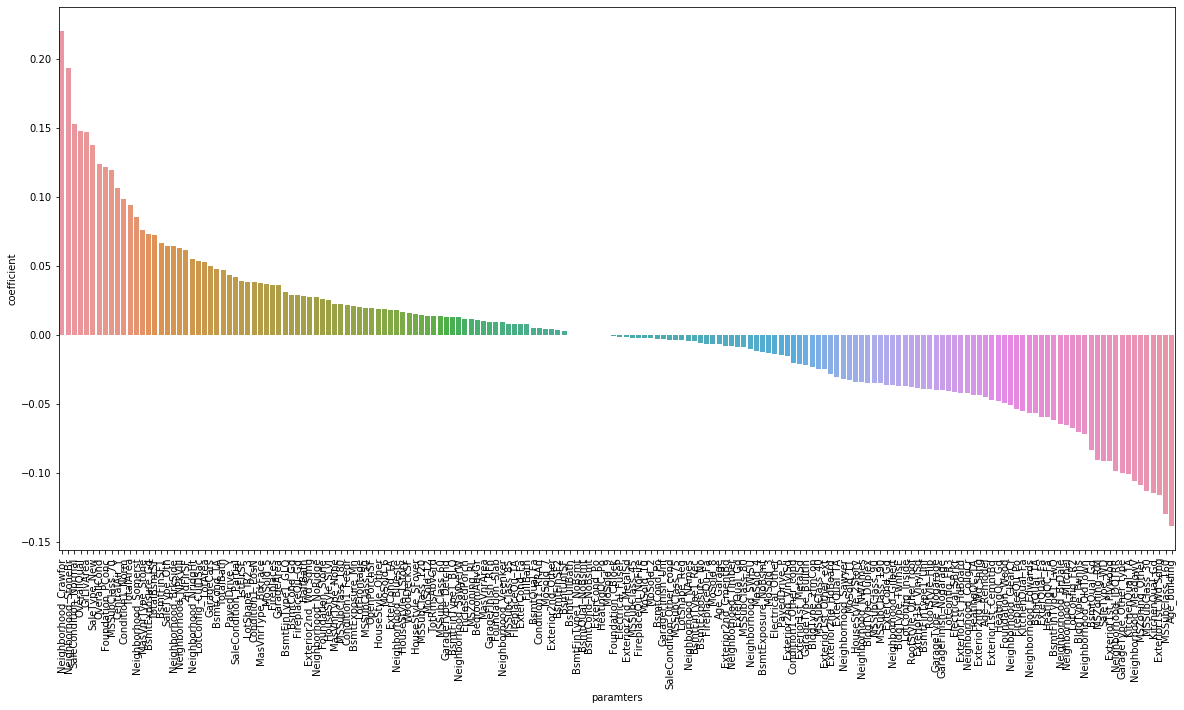

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(modelr["paramters"],modelr["coefficient"])
modell = modelr[modelr["coefficient"]!=0]
plt.xticks(rotation = 90)

In [43]:
y_pred = model_r.predict(X_train)

In [44]:
# Model Matrices
print ("R Square:",r2_score(y_train, y_pred))
print ("RMSE:",sqrt(mean_squared_error(y_train, y_pred)))

R Square: 0.9378942437412988
RMSE: 0.24921026515515207


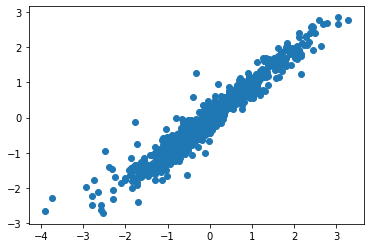

In [45]:
plt.scatter(y_train, y_pred)

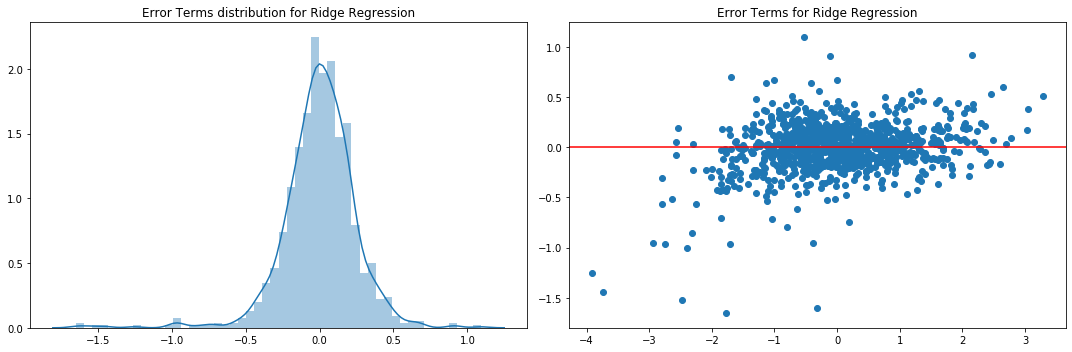

In [46]:
error  = y_train-y_pred
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Error Terms distribution for Ridge Regression")
sns.distplot(error)
plt.subplot(1,2,2)
plt.title("Error Terms for Ridge Regression")
plt.scatter(y_train,error)
plt.axhline(y=0,color='r')
plt.tight_layout()


### Testing of Ridge model

In [47]:
# Transfirmation of Test Data
X_test = df_test.drop("LogPrice", axis =1)
y_test= df_test[["LogPrice"]]

X_test[X_scale_list] = scalerX.transform(X_test[X_scale_list])
y_test["LogPrice"] = scalery.transform(y_test)

In [48]:
y_pred_testr = model_r.predict(X_test)
print ("R Square:",r2_score(y_test, y_pred_testr))
print ("RMSE:",sqrt(mean_squared_error(y_test, y_pred_testr)))

R Square: 0.9067340605247649
RMSE: 0.28762414293647287


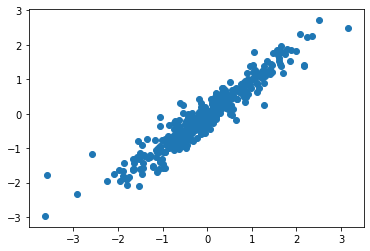

In [49]:
plt.scatter(y_test, y_pred_testr)

#### Conclusion from Ridge Regression:
 - The Errors are distributed normally with mean as 0
 - The R2 for the test data is ~ 0.91] and the train data is  ~0.94
 - The Model is using 22 independent variables.

## Lasso Regression

In [50]:
lasso = Lasso()
params = {'alpha': [0.00001,0.0001,0.0005,0.0009,0.001,0.002,0.003, 0.005,0.01,0.05]}

# cross validation
model_cvl = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cvl.fit(X_train, y_train)
print(model_cvl.best_score_)
print(model_cvl.best_estimator_.alpha)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.2s finished


-0.2022362354975514
0.001


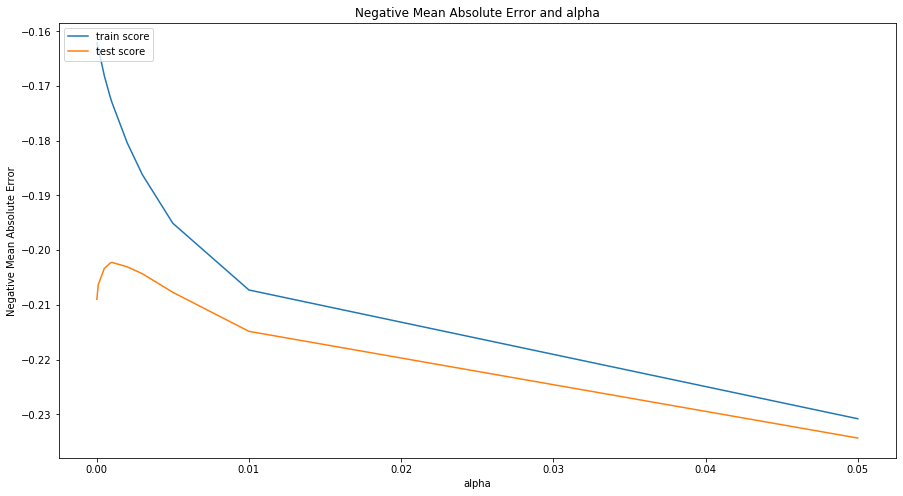

In [51]:
cv_results_l= pd.DataFrame(model_cvl.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
# plotting mean test and train scoes with alpha 
cv_results_l['param_alpha'] = cv_results_l['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(15,8))
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [52]:
model_l = Lasso(alpha=0.001)
model_l.fit(X_train, y_train)
print(model_l.coef_)

[ 0.01850563  0.04919097  0.01172733  0.06545251  0.00113891 -0.
  0.0759677  -0.          0.00112381  0.22208296  0.          0.
  0.0217629   0.00955743  0.0033074   0.04041467  0.0552868   0.03693312
  0.01624643  0.02002139  0.010007   -0.15308849 -0.03827997 -0.00335802
  0.089103    0.04879356  0.15149594  0.12598264 -0.10903713 -0.
 -0.          0.01023025 -0.          0.0926758   0.          0.
  0.         -0.01950261 -0.         -0.20052824  0.         -0.01721883
 -0.11985819  0.         -0.12723509  0.01722373 -0.          0.05329765
 -0.0481439  -0.         -0.0357997   0.         -0.          0.09986925
 -0.         -0.00720491  0.30344612 -0.00961337 -0.         -0.03733672
 -0.09313266 -0.04288668  0.02047321  0.00853051 -0.          0.01946251
  0.0692837  -0.00828153  0.         -0.          0.01045359  0.10188147
  0.26312943  0.          0.          0.          0.08850725 -0.
  0.          0.         -0.         -0.02218037 -0.0056614  -0.
 -0.         -0.00848557  

In [53]:
modell = pd.DataFrame()
modell["paramters"] = list(X_train.columns)
modell["coefficient"] = model_l.coef_
modell = modell[modell["coefficient"]!=0]
modell = modell.sort_values(by ="coefficient", ascending =False).reset_index()
modell.head(10)

,index,paramters,coefficient
0,56,Neighborhood_Crawfor,0.303446
1,72,Neighborhood_StoneBr,0.263129
2,9,GrLivArea,0.222083
3,174,SaleType_New,0.213347
4,177,SaleCondition_Normal,0.167215
5,26,OverallQual,0.151496
6,116,Foundation_PConc,0.127798
7,27,OverallCond,0.125983
8,142,CentralAir_Y,0.117263
9,71,Neighborhood_Somerst,0.101881


In [54]:
modell.tail(5)

,index,paramters,coefficient
99,157,GarageType_Other_type,-0.114081
100,42,MSZoning_Other,-0.119858
101,44,MSZoning_RM,-0.127235
102,21,Age_building,-0.153088
103,39,MSSubClass_160,-0.200528


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 <a list of 104 Text xticklabel objects>)

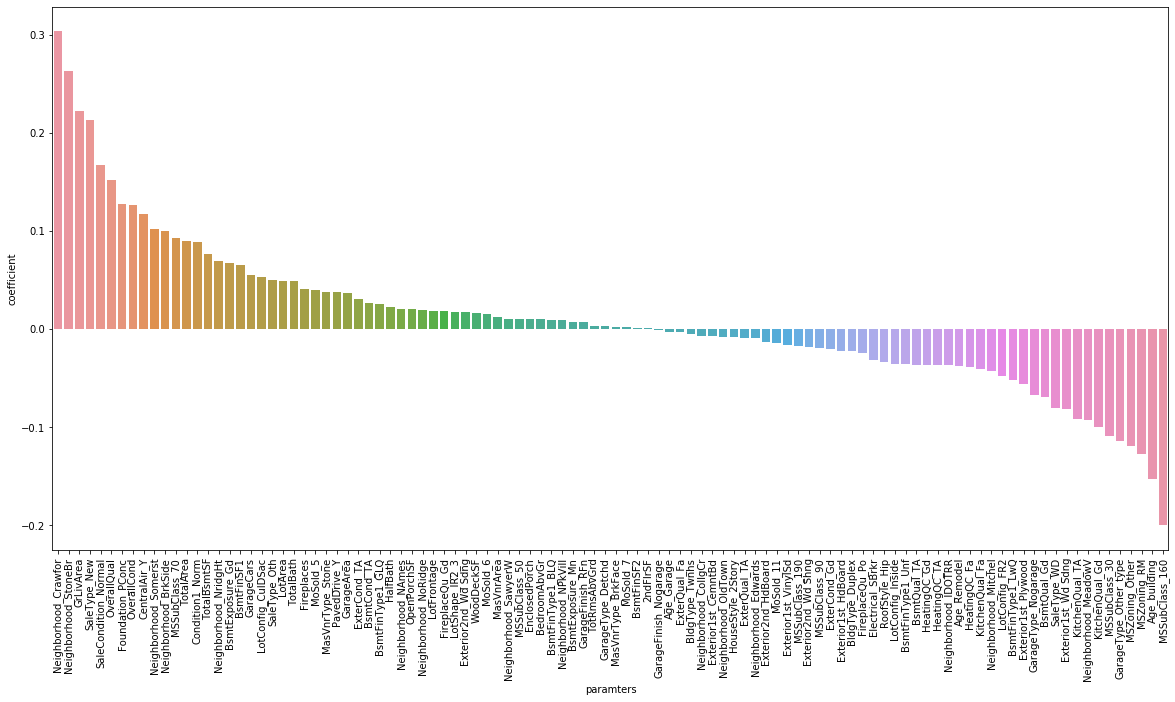

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(modell["paramters"],modell["coefficient"])
plt.xticks(rotation = 90)

In [56]:
y_pred_l = model_l.predict(X_train)
print ("R Square:",r2_score(y_train, y_pred_l))
print ("RMSE:",sqrt(mean_squared_error(y_train, y_pred_l)))

R Square: 0.9364178312014926
RMSE: 0.2521550491235648


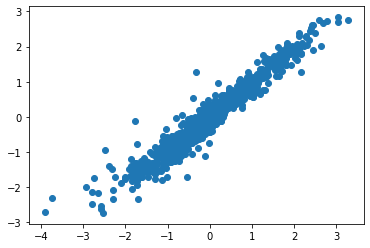

In [57]:
plt.scatter(y_train, y_pred_l)

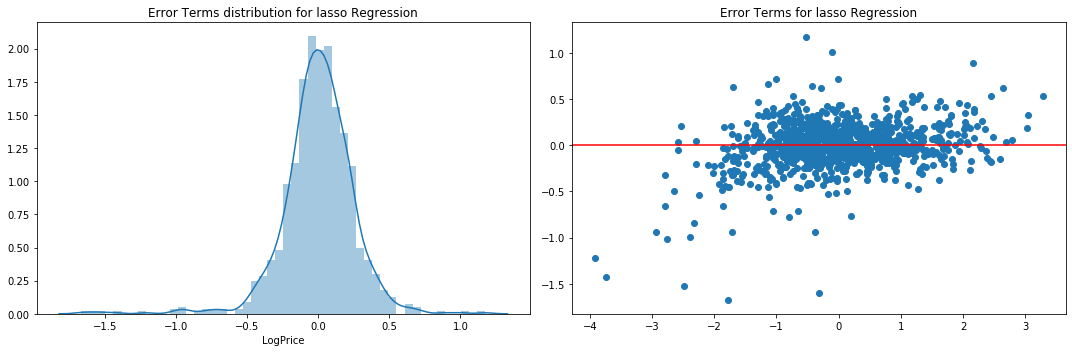

In [58]:
error_l  = y_train["LogPrice"]-y_pred_l
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Error Terms distribution for lasso Regression")
sns.distplot(error_l)
plt.subplot(1,2,2)
plt.title("Error Terms for lasso Regression")
plt.scatter(y_train,error_l)
plt.axhline(y=0,color='r')
plt.tight_layout()


### Model Testing and evaluation

In [59]:
y_pred_testl = model_l.predict(X_test)

print ("R Square:",r2_score(y_test, y_pred_testl))

print ("RMSE:",sqrt(mean_squared_error(y_test, y_pred_testl)))

R Square: 0.9078416893973359
RMSE: 0.28591112565389215


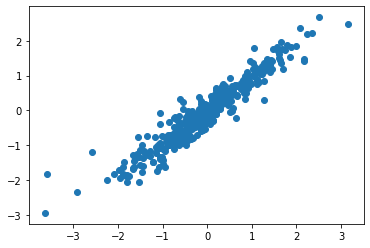

In [60]:
plt.scatter(y_test, y_pred_testl)

##### Conclusion from Lasso
 - The Errors are distributed normally with mean as 0
 - The R2 for the test data is ~ 0.89 and the train data is  ~0.91
 - The Model is using 22 independent variables.


## Model Selection and prediction of Houseprice 

# Model Selection:
 -  Although the R2 for Ridge model is ~1-2% Higher than the Lasso Model as we are using significantly lower no of variables in the Lasso model, ___Lasso model is selected___ of final prediction of Sales Price
 
 - ***__Model Preduction:__***The Model predicts the Logvalue for the sascaled sales price. So get the predicted sales price the predicted value and transformed to regular value and then the exponetial of the value gives the  predicted sales price
 
### strategy for investment: 
##### The company can use the model to predict the Price of the house using the below steps keeping inmind the below points
    - The company should focus on the houses with following properties
         - Houses in the located in Crawford or Stone Brook area
         - Houses with higher Above grade (ground) living area
         - Houses which are constructed new and sold
    - The company should not invest much on the houses with following properties
         - Houses with "2-STORY PUD - 1946 & NEWER" type of dwelling involved.
         - Houses which are very Old
         - Houses in "Residential Medium Density" Zone.
         - Houses with no garage

### Prediction using the Model 

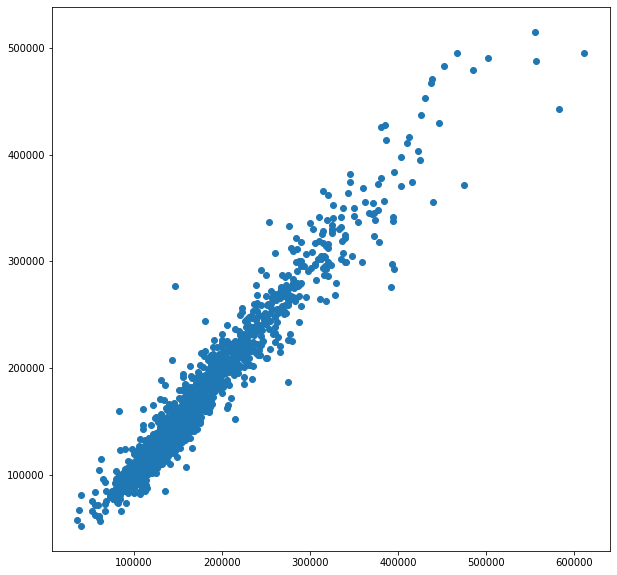

In [61]:
# applying the model on the complete dataset for House price calclation
df_final  = house_price.drop("LogPrice",axis =1)
# Scaling the Dataset
df_final[X_scale_list] = scalerX.transform(df_final[X_scale_list])
#Prediction using the model
df_final ["Prediction"] = model_l.predict(df_final)
# Removing the scaling onthe predicted value
df_final["Prediction_scale"] = scalery.inverse_transform(df_final[["Prediction"]])
# as the sales price is predicted in log using expential to get the actual value
df_final["Pr_SalesPrice"] = np.expm1(df_final["Prediction_scale"])
plt.figure(figsize = (10,10))
#plotting the predicted value vs the actiual value
plt.scatter(SalePrice["SalePrice"],df_final["Pr_SalesPrice"])

In [62]:
print ("R Square:",r2_score(SalePrice["SalePrice"],df_final["Pr_SalesPrice"]))
print ("RMSE:",sqrt(mean_squared_error(SalePrice["SalePrice"],df_final["Pr_SalesPrice"])))

R Square: 0.9391850555426136
RMSE: 18372.795628094704


# PART II

### Checking thr model with Alpha twice the optimal value

#### Ridge Regression with 2 X optimal Alpha

In [63]:
model_r1 = Ridge(alpha=20)
model_r1.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [64]:
y_pred1 = model_r1.predict(X_train)
print ("R Square:",r2_score(y_train, y_pred1))
print ("RMSE:",sqrt(mean_squared_error(y_train, y_pred1)))

R Square: 0.9352835206192553
RMSE: 0.2543943383425516


### Testing and evaluation of model

In [65]:
y_pred_test1 = model_r1.predict(X_test)
print ("R Square:",r2_score(y_test, y_pred_test1))
print ("RMSE:",sqrt(mean_squared_error(y_test, y_pred_test1)))


R Square: 0.9059738421209713
RMSE: 0.28879398801412715


In [66]:
modelr1 = pd.DataFrame()
modelr1["paramters"] = list(X_train.columns)
modelr1["coefficient"] = model_r1.coef_[0]
modelr1 = modelr1[modelr1["coefficient"]!=0]
modelr1 = modelr1.sort_values(by ="coefficient", ascending =False).reset_index()
modelr1.head(10)

,index,paramters,coefficient
0,56,Neighborhood_Crawfor,0.176134
1,26,OverallQual,0.154479
2,72,Neighborhood_StoneBr,0.134308
3,9,GrLivArea,0.129431
4,177,SaleCondition_Normal,0.127326
5,27,OverallCond,0.124947
6,116,Foundation_PConc,0.110829
7,174,SaleType_New,0.105198
8,24,TotalArea,0.100961
9,33,MSSubClass_70,0.092040


## Lasso Regression

In [67]:
model_l1 = Lasso(alpha=0.002)
model_l1.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
y_pred2 = model_l1.predict(X_train)
print ("R Square:",r2_score(y_train, y_pred2))
print ("RMSE:",sqrt(mean_squared_error(y_train, y_pred2)))

R Square: 0.932074559986743
RMSE: 0.26062509474963647


### Model Testing and evaluation

In [69]:
y_pred_test2 = model_l1.predict(X_test)
print ("R Square:",r2_score(y_test, y_pred_test2))
print ("RMSE:",sqrt(mean_squared_error(y_test, y_pred_test2)))

R Square: 0.9035971237521814
RMSE: 0.2924211621194219


In [70]:
modell1 = pd.DataFrame()
modell1["paramters"] = list(X_train.columns)
modell1["coefficient"] = list(model_l1.coef_)
modell1 = modell1[modell1["coefficient"]!=0]
modell1 = modell1.sort_values(by ="coefficient", ascending =False).reset_index()
modell1.head()

,index,paramters,coefficient
0,56,Neighborhood_Crawfor,0.267674
1,174,SaleType_New,0.194316
2,72,Neighborhood_StoneBr,0.192607
3,9,GrLivArea,0.177082
4,24,TotalArea,0.172039


### Question 3: Dropping the top 5 variables

In [71]:
# Creating a New Model after dropping Top 5 Features:
X_train_new  = X_train.drop(["Neighborhood_Crawfor","SaleType_New","Neighborhood_StoneBr","GrLivArea",
                             "TotalArea"], axis =1)
X_test_new  = X_test.drop(["Neighborhood_Crawfor","SaleType_New","Neighborhood_StoneBr","GrLivArea",
                             "TotalArea"], axis =1)

In [72]:
# cross validation
params = {'alpha': [0.00001,0.0001,0.001,0.005,0.01, 0.05, 0.1, 1.0, 10.0, 20.0 ]}
model_cvn = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cvn.fit(X_train_new, y_train)
print(model_cvn.best_score_)
print(model_cvn.best_estimator_.alpha)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.20849316853268607
0.001


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.6s finished


In [73]:
model_l2= Lasso(alpha=0.001)
model_l2.fit(X_train_new, y_train)
y_pred_l2 = model_l2.predict(X_train_new)
print ("R Square:",r2_score(y_train, y_pred_l2))
print ("RMSE:",sqrt(mean_squared_error(y_train, y_pred_l2)))

R Square: 0.9328533616455488
RMSE: 0.25912668398768046


In [74]:
# Testing the new model
y_pred_testl2 = model_l2.predict(X_test_new)
print ("R Square:",r2_score(y_test, y_pred_testl2))
print ("RMSE:",sqrt(mean_squared_error(y_test, y_pred_testl2)))


R Square: 0.9025218287679885
RMSE: 0.29404749864658597


In [75]:
modell2 = pd.DataFrame()
modell2["paramters"] = list(X_train_new.columns)
modell2["coefficient"] = model_l2.coef_
modell2 = modell2[modell2["coefficient"]!=0]
modell2 = modell2.sort_values(by ="coefficient", ascending =False).reset_index()
modell2.head()

,index,paramters,coefficient
0,8,2ndFlrSF,0.246226
1,7,1stFlrSF,0.199947
2,31,MSSubClass_70,0.162855
3,24,OverallQual,0.159258
4,172,SaleCondition_Normal,0.154314


### End of section Part II